In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
states = gpd.read_file('states/tl_2017_us_state.shp')

In [26]:
states_df = states[(states['NAME'] != 'Guam') & (states['NAME'] != 'United States Virgin Islands') & (states['NAME'] != 'American Samoa') & (states['NAME'] != 'United States Virgin Islands') & (states['NAME'] != 'Commonwealth of the Northern Mariana Islands')]

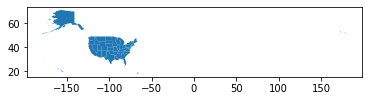

In [27]:
states_df.plot()

In [32]:
states = states_df.to_crs(epsg=5071)


In [36]:
states = states[(states['NAME'] != 'Alaska') & (states['NAME'] != 'Hawaii') & (states['NAME'] != 'Puerto Rico')]

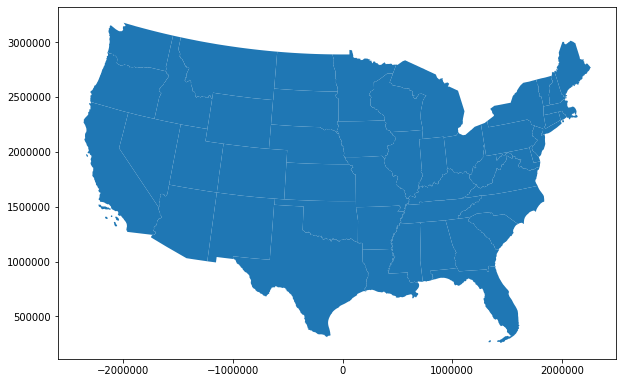

In [38]:
states.plot(figsize=(10, 10))

(-2592850.698932405, 2495054.614420507, 113154.05293371654, 3323342.705082598)

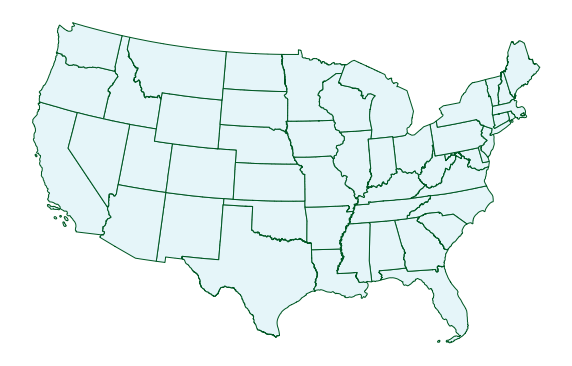

In [40]:
# Coloring shape:
# fill - inside part (color)
# stroke/line/edge - outline (edgecolor) - width (linewidth)
ax = states.plot(figsize=(10, 10), color='#e5f5f9', edgecolor='#005824')
ax.axis('off')

In [64]:
powerplants = pd.read_csv('powerplants/powerplants.csv', sep=';')
points = powerplants.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
points.crs = 'epsg:4326'
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants = powerplants[(powerplants['StateName'] != 'Guam') & (powerplants['StateName'] != 'United States Virgin Islands') & (powerplants['StateName'] != 'American Samoa') & (powerplants['StateName'] != 'United States Virgin Islands') & (powerplants['StateName'] != 'Commonwealth of the Northern Mariana Islands')]
powerplants = powerplants[(powerplants['StateName'] != 'Alaska') & (powerplants['StateName'] != 'Hawaii') & (powerplants['StateName'] != 'Puerto Rico')]
powerplants = powerplants.to_crs(epsg=5071)

(-2592850.698932405, 2495054.614420507, 113154.05293371654, 3323342.705082598)

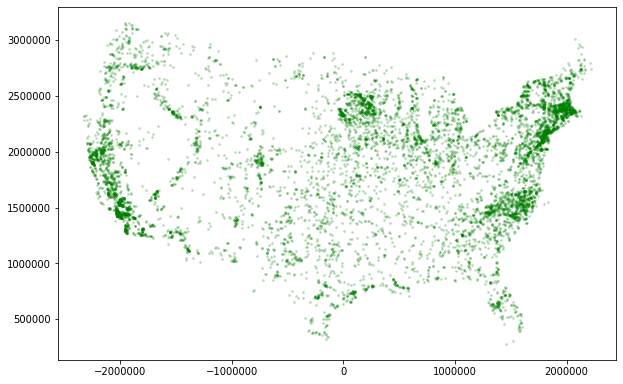

In [65]:
powerplants.plot(figsize=(10, 10), color='green', markersize=3, alpha=0.2)
ax.axis('off')

(1000000, 2000000)

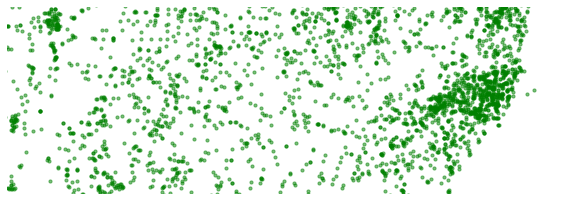

In [69]:
# Limit the plotting to a specific area
ax = powerplants.plot(figsize=(10,10), color='green', markersize=10, alpha=0.5)
ax.axis('off')
ax.set_xlim([-1000000, 2000000])
ax.set_ylim([1000000, 2000000])